<a href="https://colab.research.google.com/github/ZichenLiu123/DataAnalysisStocks/blob/main/Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas as pd
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

##Machine Learning
import sklearn.metrics as metrics

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

##Download Resources
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download('punkt')

from nltk.tokenize import word_tokenize, wordpunct_tokenize, sent_tokenize
from nltk.corpus import stopwords

from IPython.display import display

%pip install svgling
%pip install datasets

pd.options.mode.chained_assignment = None

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from datasets import load_dataset

babe_dataset = load_dataset("mediabiasgroup/BABE-v3")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/4121 [00:00<?, ? examples/s]

In [ ]:
# convert to df
babe_df = pd.DataFrame(babe_dataset['train'])
babe_df_cleaned = babe_df[['text', 'topic']]

babe_df_cleaned.loc[:, 'topic'] = babe_df_cleaned.loc[:, 'topic'].apply(lambda x: " ".join(x.split("-")))

# print number of unique topics
print("Number of unique topics:", len(babe_df_cleaned['topic'].unique()))

babe_df_cleaned.head()

Number of unique topics: 22


,text,topic
0,But instead of closing loopholes that allow cr...,gun control
1,"""You think I'm joking,"" he continued. """,blm
2,"Yes, the rich are rich and want to stay that w...",taxes
3,Americans are carrying $1.57 trillion in outst...,student debt
4,Republican state legislators from Texas to Ari...,gun control


# Q1

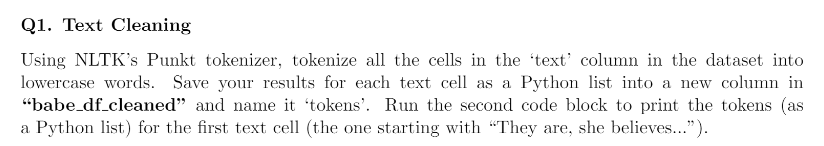

In [ ]:
def make_tokens(df: pd.DataFrame) -> pd.DataFrame:
  ## Your code starts here ##
  df ['tokens'] = df['text'].apply(lambda x: word_tokenize(x.lower()))
  ## end ##
  return df

In [ ]:
babe_df_cleaned = make_tokens(babe_df_cleaned)
babe_df_cleaned
print(babe_df_cleaned.loc[0, 'tokens'])

['but', 'instead', 'of', 'closing', 'loopholes', 'that', 'allow', 'criminals', 'to', 'access', 'firearms', ',', 'the', 'bill', 'by', 'house', 'democrats', 'could', 'turn', 'millions', 'of', 'law-abiding', 'american', 'gun', 'owners', 'into', 'felons', '.']


# Q2

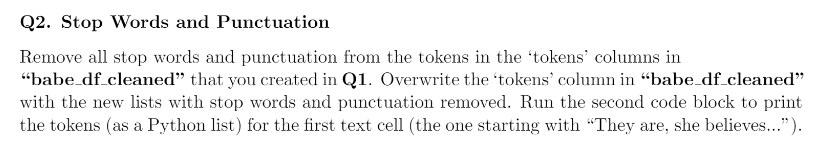

In [ ]:
def clean_tokens(df: pd.DataFrame) -> pd.DataFrame:
  ## Your code starts here ##
  stop_words = set(stopwords.words("english"))
  df["tokens"] = df["tokens"].apply(lambda x: [word for word in x if word.isalpha()])
  df["tokens"] = df["tokens"].apply(lambda y: [word for word in y if word.lower() not in stop_words])

  ## end ##
  return df

In [ ]:
babe_df_cleaned = clean_tokens(babe_df_cleaned)
print(babe_df_cleaned['tokens'].iloc[0])


['instead', 'closing', 'loopholes', 'allow', 'criminals', 'access', 'firearms', 'bill', 'house', 'democrats', 'could', 'turn', 'millions', 'american', 'gun', 'owners', 'felons']


# Q3



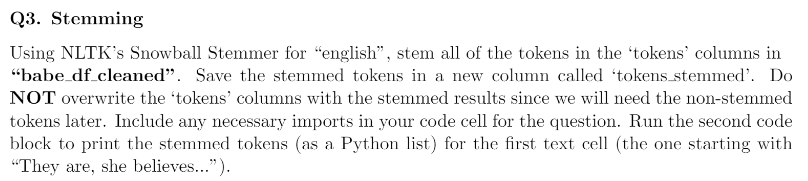

In [ ]:
from nltk.stem.snowball import SnowballStemmer

def stem_tokens(df: pd.DataFrame) -> pd.DataFrame:
    stemmer = SnowballStemmer("english")

    def stem_list(tokens):
        return [stemmer.stem(token) for token in tokens]

    df['tokens_stemmed'] = df['tokens'].apply(stem_list)

    return df


In [ ]:
babe_df_cleaned = stem_tokens(babe_df_cleaned)
print(babe_df_cleaned['tokens_stemmed'].iloc[0])

,text,topic,tokens,tokens_stemmed
0,But instead of closing loopholes that allow cr...,gun control,"[instead, closing, loopholes, allow, criminals...","[instead, close, loophol, allow, crimin, acces..."
1,"""You think I'm joking,"" he continued. """,blm,"[think, joking]","[think, joke]"
2,"Yes, the rich are rich and want to stay that w...",taxes,"[yes, rich, rich, want, stay, way, yet, time, ...","[yes, rich, rich, want, stay, way, yet, time, ..."
3,Americans are carrying $1.57 trillion in outst...,student debt,"[americans, carrying, trillion, outstanding, s...","[american, carri, trillion, outstand, student,..."
4,Republican state legislators from Texas to Ari...,gun control,"[republican, state, legislators, texas, arizon...","[republican, state, legisl, texa, arizona, wis..."
...,...,...,...,...
4116,Far-right talk show host Glenn Beck is being s...,universal health care,"[talk, show, host, glenn, beck, slammed, every...","[talk, show, host, glenn, beck, slam, everyon,..."
4117,After President Donald Trump’s news conference...,elections 2020,"[president, donald, trump, news, conference, p...","[presid, donald, trump, news, confer, posit, j..."
4118,When Republicans warned Democrats that impeach...,coronavirus,"[republicans, warned, democrats, impeachment, ...","[republican, warn, democrat, impeach, wast, ti..."
4119,Sen. Tom Cotton (R-AR) says it “makes absolute...,universal health care,"[tom, cotton, says, makes, absolutely, sense, ...","[tom, cotton, say, make, absolut, sens, contin..."


# Q4

## (a)

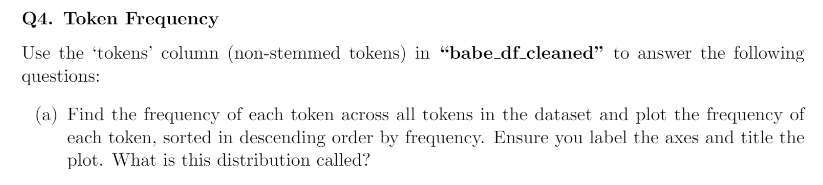

<Axes: title={'center': 'Zipf Plot'}, xlabel='Tokens', ylabel='Frequency'>

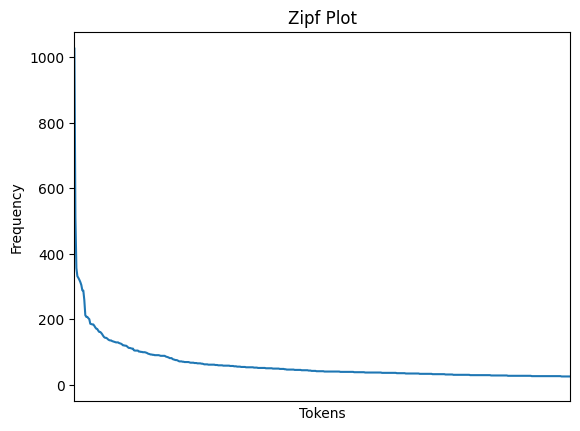

In [ ]:
## Your code starts here ##
token_count = Counter()

for tokens in babe_df_cleaned["tokens"]:
  token_count.update(tokens)

freq_df = pd.DataFrame.from_dict(token_count, orient='index', columns=['Frequency']).sort_values(by='Frequency', ascending=False)
ax = freq_df.plot(legend=False, xlabel='Tokens', ylabel='Frequency', title= "Zipf Plot")
ax.set_xticks([])
ax.set_xlim(0, 500)
ax

## end ##

Enter answer here: Zipf Distribution

## (b)

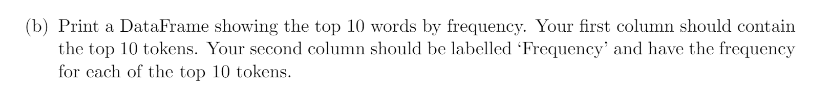

In [ ]:
## Your code starts here
freq_df.head(10)
## end ##

,Frequency
trump,1027
president,512
said,357
people,332
would,327
new,321
donald,314
white,305
police,289
coronavirus,288


# Q5

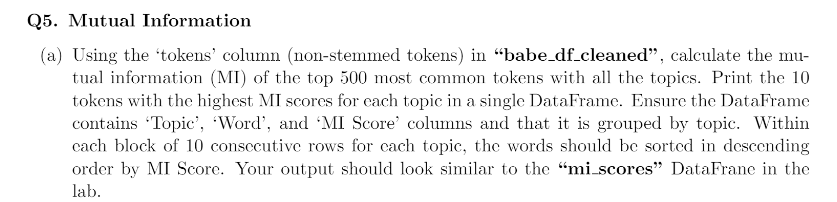

## (a)

In [ ]:
## Your code starts here ##
# Using topk words, we will do mutual information
# get the top 500 words by frequency
freq_df['Word'] = freq_df.index
topk = [tuple(x) for x in freq_df.head(500).to_numpy()]

# create a binary list for each row in the dataset to indicate if it contains
# each word in the top 500
freqText = []
for entry in babe_df_cleaned['tokens']:
    tempCounter = Counter(entry)
    topkinText = [1 if tempCounter[word] > 0 else 0 for (wordCount,word) in topk]
    freqText.append(topkinText)

# Turn these lists into a DataFrame
freqTextDf = pd.DataFrame(freqText)
dfName = []
for c in topk:
    dfName.append(c[1])
freqTextDf.columns = dfName

# Merge DataFrame with dataset DataFrame
finalTextDf = babe_df_cleaned[['text','topic', 'tokens']].join(freqTextDf)

def getMI(topk, df, label_column='topic'):
    unique_labels = df[label_column].unique()

    # create a placeholder df
    overallDf = pd.DataFrame()

    # loop through each topic
    for topic in unique_labels:
      miScore = []

      # create a binary column for the current topic
      label_col = df[label_column].copy()
      label_col[label_col != topic] = 0
      label_col[label_col == topic] = 1

      # get the mi score for each word with the current topic
      for word in topk:
          miScore.append([word[1]]+[metrics.mutual_info_score(label_col, df[word[1]])] + [topic])

      # combine the scores of all words for the topic into the df
      miScoredf = pd.DataFrame(miScore).sort_values(1,ascending=0)
      miScoredf.columns = ['Word','MI Score','Topic']
      overallDf = pd.concat([overallDf, miScoredf])

    return overallDf


mi_scores = getMI(topk, finalTextDf)

# show top 10 words for each topic
mi_scores = mi_scores.set_index(['Word']).groupby('Topic')['MI Score'].nlargest(10).reset_index()
mi_scores

## end ##

KeyboardInterrupt: 

## (b)

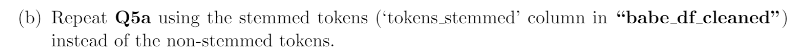

In [ ]:
## Your code starts here ##
# Using topk words, we will do mutual information
# get the top 500 words by frequency
token_count = Counter()

for tokens in babe_df_cleaned["tokens_stemmed"]:
  token_count.update(tokens)

freq_df = pd.DataFrame.from_dict(token_count, orient='index', columns=['Frequency']).sort_values(by='Frequency', ascending=False)

freq_df['Word'] = freq_df.index
topk = [tuple(x) for x in freq_df.head(500).to_numpy()]
freq_df['Word'] = freq_df.index
topk = [tuple(x) for x in freq_df.head(500).to_numpy()]

# create a binary list for each row in the dataset to indicate if it contains
# each word in the top 500
freqText = []
for entry in babe_df_cleaned['tokens_stemmed']:
    tempCounter = Counter(entry)
    topkinText = [1 if tempCounter[word] > 0 else 0 for (wordCount,word) in topk]
    freqText.append(topkinText)

# Turn these lists into a DataFrame
freqTextDf = pd.DataFrame(freqText)
dfName = []
for c in topk:
    dfName.append(c[1])
freqTextDf.columns = dfName

# Merge DataFrame with dataset DataFrame
finalTextDf = babe_df_cleaned[['text','topic', 'tokens_stemmed']].join(freqTextDf)

def getMI(topk, df, label_column='topic'):
    unique_labels = df[label_column].unique()

    # create a placeholder df
    overallDf = pd.DataFrame()

    # loop through each topic
    for topic in unique_labels:
      miScore = []

      # create a binary column for the current topic
      label_col = df[label_column].copy()
      label_col[label_col != topic] = 0
      label_col[label_col == topic] = 1

      # get the mi score for each word with the current topic
      for word in topk:
          miScore.append([word[1]]+[metrics.mutual_info_score(label_col, df[word[1]])] + [topic])

      # combine the scores of all words for the topic into the df
      miScoredf = pd.DataFrame(miScore).sort_values(1,ascending=0)
      miScoredf.columns = ['Word','MI Score','Topic']
      overallDf = pd.concat([overallDf, miScoredf])

    return overallDf


mi_scores = getMI(topk, finalTextDf)

# show top 10 words for each topic
mi_scores = mi_scores.set_index(['Word']).groupby('Topic')['MI Score'].nlargest(10).reset_index()
mi_scores

## end ##

## (c)


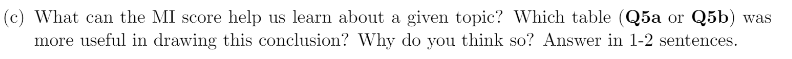

Enter answer here: The MI score quantifies the association and relevance of words within a topic, highlighting those that are uniquely informative about the topic's content. Although its subjective, in this context, I believe the table with stemmed tokens (Q5b) was more useful as it consolidated variations of words, better capturing the core themes and concepts central to each topic.